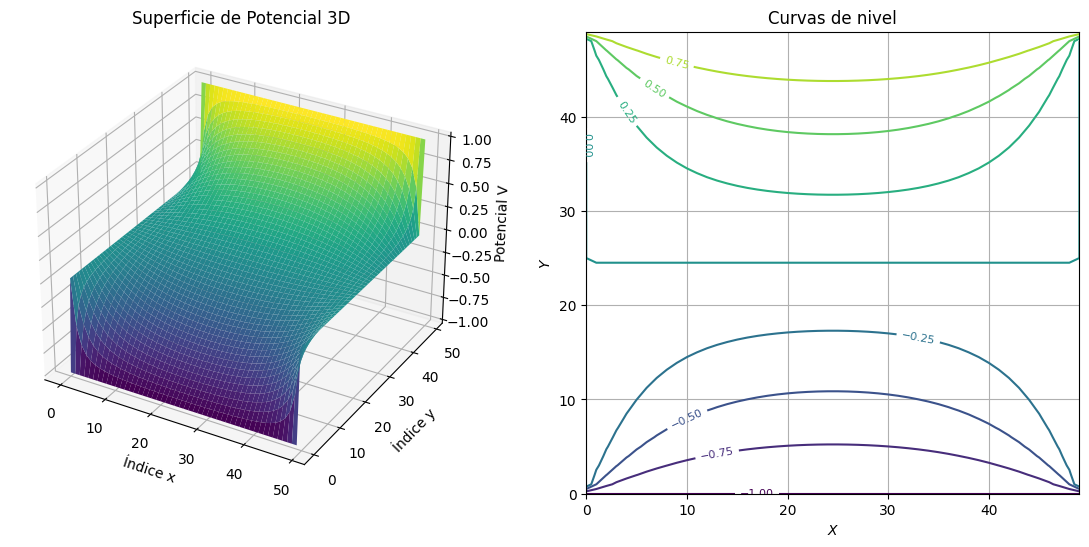

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

def actualizar_potencial(V):
    """
    Actualiza los valores del potencial en la matriz V según el promedio de los vecinos.
    """
    V_nuevo = V.copy()
    for i in range(1, V.shape[0]-1):
        for j in range(1, V.shape[1]-1):
            V_nuevo[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
    return V_nuevo

def inicializar_matriz_con_condiciones(N, M, v0):
    """
    Inicializa la matriz de potenciales con las condiciones de frontera dadas.
    """
    V = np.zeros((N, M))
    V[0, :] = -v0
    V[-1, :] = v0
    return V

def resolver_laplace_y_graficar(N, M, v0, epsilon=1e-5):
    """
    Resuelve la ecuación de Laplace usando relajación hasta alcanzar la convergencia.
    """
    V = inicializar_matriz_con_condiciones(N, M, v0)
    delta = 1.0
    while delta > epsilon:
        V_nuevo = actualizar_potencial(V)
        delta = np.max(np.abs(V_nuevo - V))
        V = V_nuevo

    X, Y = np.meshgrid(np.arange(M), np.arange(N))

    # Gráfico de superficie 3D
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, V, cmap='viridis', edgecolor='none')
    ax.set_title('Superficie de Potencial 3D')
    ax.set_xlabel('Índice x')
    ax.set_ylabel('Índice y')
    ax.set_zlabel('Potencial V')

    # Gráfico de curvas de nivel con etiquetas
    ax1 = fig.add_subplot(1, 2, 2)
    ax1.grid()
    ax1.set_xlabel(r'$X$')
    ax1.set_ylabel(r'$Y$')
    ax1.set_title('Curvas de nivel')
    Lvl_crvs = ax1.contour(X, Y, V)
    ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline=True, fontsize=8)

    plt.show()
    return V

# Parámetros del problema
N, M = 50, 50  # Dimensiones de la red
v0 = 1  # Valor de potencial para las condiciones de frontera

V = resolver_laplace_y_graficar(N, M, v0)


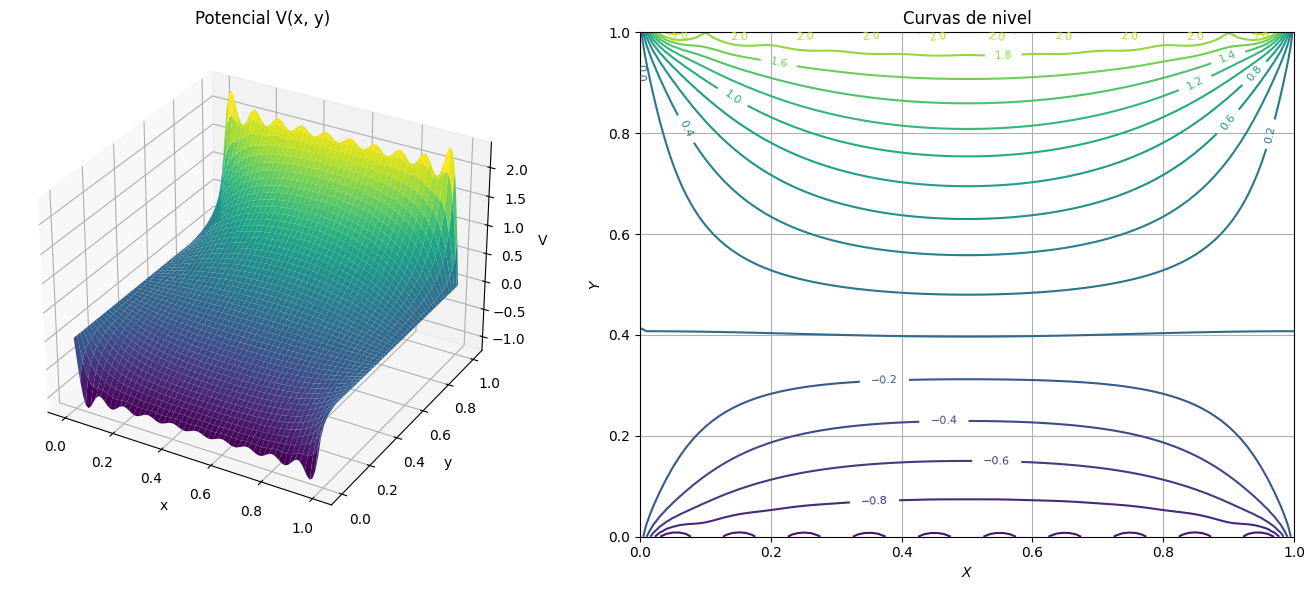

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calcular_potencial(V0, a, b, x, y, N=10):
    suma = 0
    for n in range(1, 2*N, 2):  # Iterar sobre n = 1, 3, 5, ..., hasta 2N-1
        numerador = ((2*V0*np.sinh(n*np.pi*y/a)) - (V0*np.sinh(n*np.pi*(b-y)/a)))
        denominador = np.sinh(n*np.pi*b/a)
        suma += (1/n) * (numerador/denominador) * np.sin(n*np.pi*x/a)
    return (4/np.pi) * suma

# Parámetros
V0 = 1
a = 1
b = 1
N = 10  # Número de términos a sumar en la serie
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)
Z = calcular_potencial(V0, a, b, X, Y, N)

# Graficar en 3D y Curvas de nivel
fig = plt.figure(figsize=(14, 6))

# Gráfica 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Potencial V(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')

# Gráfico de curvas de nivel con etiquetas
ax1 = fig.add_subplot(1, 2, 2)
ax1.grid()
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_title('Curvas de nivel')
Lvl_crvs = ax1.contour(X, Y, Z, levels=20)  # Puedes ajustar el número de niveles según sea necesario
ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline=True, fontsize=8)

plt.tight_layout()
plt.show()


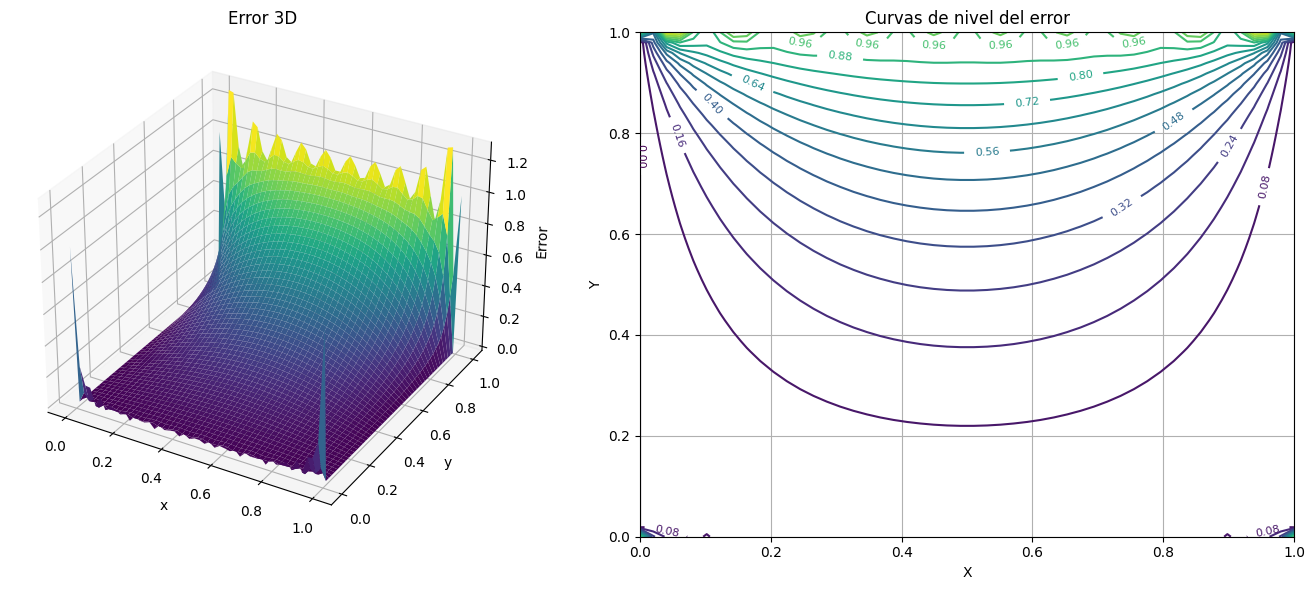

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calcular_potencial(V0, a, b, x, y, N=10):
    suma = 0
    for n in range(1, 2*N, 2):
        numerador = ((2*V0*np.sinh(n*np.pi*y/a)) - (V0*np.sinh(n*np.pi*(b-y)/a)))
        denominador = np.sinh(n*np.pi*b/a)
        suma += (1/n) * (numerador/denominador) * np.sin(n*np.pi*x/a)
    return (4/np.pi) * suma

def actualizar_potencial(V):
    V_nuevo = V.copy()
    for i in range(1, V.shape[0]-1):
        for j in range(1, V.shape[1]-1):
            V_nuevo[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
    return V_nuevo

def inicializar_matriz_con_condiciones(N, M, v0):
    V = np.zeros((N, M))
    V[0, :] = -v0
    V[-1, :] = v0
    return V

def resolver_laplace(N, M, v0, epsilon=1e-5):
    V = inicializar_matriz_con_condiciones(N, M, v0)
    delta = 1.0
    while delta > epsilon:
        V_nuevo = actualizar_potencial(V)
        delta = np.max(np.abs(V_nuevo - V))
        V = V_nuevo
    return V

def calcular_error_y_graficar(V_serie, V_numerico):
    error = np.abs(V_serie - V_numerico)
    N, M = V_serie.shape
    X, Y = np.meshgrid(np.linspace(0, 1, M), np.linspace(0, 1, N))

    fig = plt.figure(figsize=(14, 6))

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, error, cmap='viridis')
    ax.set_title('Error 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Error')

    ax1 = fig.add_subplot(1, 2, 2)
    ax1.grid()
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Curvas de nivel del error')
    Lvl_crvs = ax1.contour(X, Y, error, levels=20)
    ax1.clabel(Lvl_crvs, Lvl_crvs.levels, inline=True, fontsize=8)

    plt.tight_layout()
    plt.show()

# Parámetros del problema
N, M = 50, 50
v0 = 1
a = 1
b = 1
x = np.linspace(0, a, M)
y = np.linspace(0, b, N)
X, Y = np.meshgrid(x, y)

# Calcular potencial usando la serie
V_serie = calcular_potencial(v0, a, b, X, Y, N=10)

# Calcular potencial usando la solución numérica
V_numerico = resolver_laplace(N, M, v0)

# Calcular y graficar el error
calcular_error_y_graficar(V_serie, V_numerico)
